# Test Notebook for testing in a jupyter instance running inside a container on the cluster

## Run unittests

### Check if the username is set correctly

The username is needed for the tests to determine the correct path to the workspaces.

In [3]:
import os
print(os.environ.get('USER'))

tkorten


In [1]:
%run -i 'test.py'

...../app/env/lib/python3.11/site-packages/taurus_datamover/_datamover.py:320: UserWarning: process: /sw/taurus/tools/slurmtools/default/bin/dtcp -r /scratch/ws/0/tkorten-test_cache/pwzjrkwj/fileserver/userdir/testdata_missing.npy /scratch/ws/0/tkorten-tmp/rag0dcng/testdata_missing.npy --blocking
exited with error: srun: job 32490878 queued and waiting for resources
srun: job 32490878 has been allocated resources
srun: error: ioctl(TIOCGWINSZ): Inappropriate ioctl for device
srun: error: Not using a pseudo-terminal, disregarding --pty option
cp: cannot stat '/scratch/ws/0/tkorten-test_cache/pwzjrkwj/fileserver/userdir/testdata_missing.npy': No such file or directory
srun: error: taurusexport3: task 0: Exited with exit code 1
and output: 
  warnings.warn(warning_message)
..

sending incremental file list
./
testdata.csv
testdata.npy
testimage.tif

sent 66,249 bytes  received 76 bytes  168.98 bytes/sec
total size is 65,986  speedup is 0.99



........

/app/env/lib/python3.11/site-packages/taurus_datamover/_datamover.py:308: UserWarning: Timeout while waiting for process: /sw/taurus/tools/slurmtools/default/bin/dtls -R1 /scratch/ws/0/tkorten-test_cache/a8sinb3t/fileserver/userdir --blocking
  warnings.warn(
....

sending incremental file list
deleting testimage.tif
deleting testdata.npy
deleting testdata.csv
./

sent 65 bytes  received 68 bytes  0.82 bytes/sec
total size is 0  speedup is 0.00



./app/env/lib/python3.11/site-packages/biapol_taurus/_project_file_transfer.py:630: UserWarning: What you are trying to do requires confirmation. Enforcing dry-run...
  warnings.warn(
.

sending incremental file list
./
testdata.csv
testdata.npy
testimage.tif

sent 66,237 bytes  received 76 bytes  98.17 bytes/sec
total size is 65,986  speedup is 1.00



.

sending incremental file list
./

sent 82 bytes  received 19 bytes  5.18 bytes/sec
total size is 32,896  speedup is 325.70



..

sending incremental file list
./
testdata.npy

sent 33,029 bytes  received 38 bytes  462.48 bytes/sec
total size is 32,896  speedup is 0.99



.

sending incremental file list
./
testdata.npy

sent 33,029 bytes  received 38 bytes  3,480.74 bytes/sec
total size is 32,896  speedup is 0.99



.

sending incremental file list
./
testdata_new.npy

sent 33,033 bytes  received 38 bytes  2,875.74 bytes/sec
total size is 32,896  speedup is 0.99



.
----------------------------------------------------------------------
Ran 27 tests in 2922.997s

OK


## Run a small test workflow

set up a ProjectFileTransfer object that handles transfers to and from the fileserver

In [4]:
from biapol_taurus import ProjectFileTransfer

# We get files from the fileserver:
source_dir = "/grp/g_biapol/till"
pft = ProjectFileTransfer(source_dir)
pft.sync_from_fileserver()

Waiting ................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

use the imread and imsave methods from ProjectFileTransfer in order to load files from the cache workspace and save them directly to the fileserver

In [10]:
imread = pft.imread
imsave = pft.imsave

list all files on the fileserver

In [5]:
pft.list_files()

['/scratch/ws/0/tkorten-cache/0m6r66ao',
 '/scratch/ws/0/tkorten-cache/2022-08-18 bg data',
 '/scratch/ws/0/tkorten-cache/2022-08-18 bg data/25xSIL_385_EPI_fast_bright.nd2',
 '/scratch/ws/0/tkorten-cache/2022-08-18 bg data/25xSIL_405_488_647_CSU_fast_dark_timelapse.nd2',
 '/scratch/ws/0/tkorten-cache/2022-08-18 bg data/25xSIL_405_488_647_CSU_fast_roi512_dark.nd2',
 '/scratch/ws/0/tkorten-cache/2022-08-18 bg data/25xSIL_405_488_647_CSU_fast_roi512_dark001.nd2',
 '/scratch/ws/0/tkorten-cache/2022-08-18 bg data/25xSIL_405_488_647_CSU_fast_roi512_zstack.nd2',
 '/scratch/ws/0/tkorten-cache/2022-08-18 bg data/25xSIL_405_488_647_CSU_fast_roi512_zstack.nd2denoised.tif',
 '/scratch/ws/0/tkorten-cache/2022-08-18 bg data/25xSIL_405_488_647_CSU_fast_roi512_zstack.nd2denoised_multi.tif',
 '/scratch/ws/0/tkorten-cache/2022-08-18 bg data/25xSIL_405_488_647_CSU_fast_roi512_zstack.nd2denoised_single.tif',
 '/scratch/ws/0/tkorten-cache/2022-08-18 bg data/25xSIL_405_488_647_CSU_fast_roi512_zstack001.nd2'

this will read the image directly from the cache (therefore it is fast and does not show a waitbar

In [6]:
image = imread("test/blobs19.tif")

read all tiff images from the fileserver

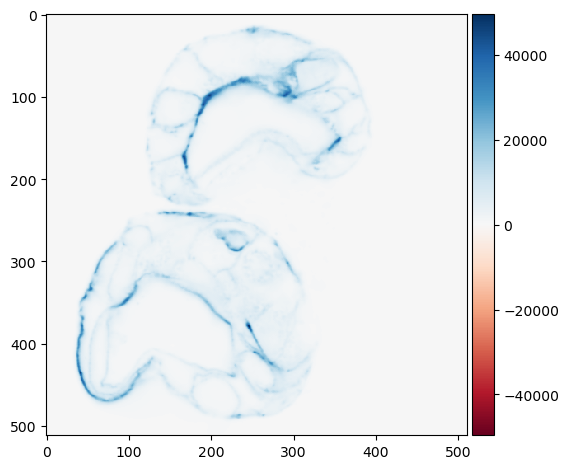

In [7]:
images = []
for filename in pft.list_files():
   if filename.endswith(".tif"):
      images.append(imread(filename))

from skimage.io import imshow
imshow(images[0][40])

save a pandas dataframe directly to the fileserver

In [8]:
import pandas as pd
dataframe = pd.DataFrame({'area': [0.5, 2, 4.5], 'intensity': [0.25, 4, 20]})
pft.csv_save("test/measurements.csv", dataframe)

Waiting ..............................................................target file: /grp/g_biapol/till/test/measurements.csv


sync changed files back to the fileserver

In [9]:
pft.sync_to_fileserver()

Waiting ........................................................................................................sending incremental file list
./
2022-08-18 bg data/
test/

sent 4,772 bytes  received 132 bytes  9,808.00 bytes/sec
total size is 28,647,930,911  speedup is 5,841,747.74

